In [2]:
push!(LOAD_PATH, "../../src");

In [15]:
#nbx --fname="../../src/house_expo_utils.jl"

import JSON
using Pose2D: Pose, Control
using Geometry: bounding_box, Segment, segments
using MyUtils: summarize_vars

In [16]:
#nbx
"""
```julia
    _segs, _boxes, _paths = load_env(fname)
```
Example:
```julia
fname = "../data/task_inputs/test_env_1.json"
_segs, _boxes, _paths = load_env(fname)
```
"""
function load_env(fname)
    d = JSON.parsefile(fname)
    verts    = Vector{Vector{Float64}}(d["verts"]);
    clutter  = Vector{Vector{Vector{Float64}}}(d["clutter_verts"]);
    _paths  = Vector{Vector{Vector{Float64}}}(d["paths"]);
    
    _segs   = segments(verts);
    _boxes  = vcat(segments.(clutter)...);

    return _segs, _boxes, _paths
end

load_env

In [17]:
#nbx
"""
```julia
    _ps, _us = unpack_path(path)
```
"""
function unpack_path(path)
    xs = path

    # Unpack path into 
    # poses and controls
    _dxs  = xs[2:end] - xs[1:end-1]
    _hds  = angle.(_dxs)
    _dhds = _hds[2:end] - _hds[1:end-1];
    _xs   = xs[1:end-2]; 

    _ps = [Pose(x,hd) for (x,hd) in zip(_xs, _hds)];
    _us = [Control(dx,dhd) for (dx,dhd) in zip(_dxs, _dhds)]

    _T  = length(_xs);

    return _ps, _us
end;

unpack_path

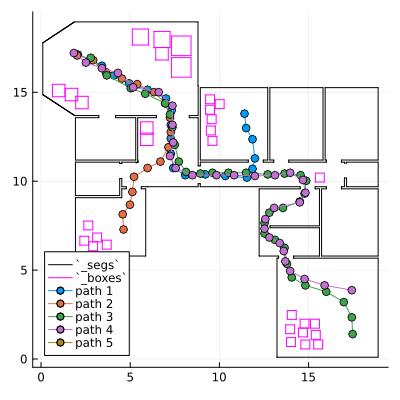

In [22]:
using Colors, Plots
col = palette(:default);


fname = "../data/task_inputs/test_env_1.json"
_segs, _boxes, _paths = load_env(fname)
_ps, _us = unpack_path(_paths[1])
_T = length(_ps)

# ----------------
mypl = plot(size=(400,400), aspect_ration=:equal)
plot!(_segs, c=:black, label="`_segs`")
plot!(_boxes, c=:magenta, label="`_boxes`")
for (i,xs) in enumerate(_paths)
    plot!(xs, marker=:o, c=col[i], label="path $i")
end
mypl